In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = False

In [2]:
import sys 
sys.path.append('../')

from BackDiffuse_LT import BackDiffuse
from GetCoreData_fct import GetCoreData
from ExtFunctions import interpCores

In [4]:
site = 'SiteB'

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']

core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']


DataAll = GetCoreData(site)

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


In [5]:
def DiffLen_V_Npeaks(site_in, diffLen_start, diffLen_end, max_Npeaks = 500):
    site = site_in

    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']

    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTamb = CoreSpecs['dTamb']
    dLaki = CoreSpecs['dLaki']


    DataAll = GetCoreData(site)
    
    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
    data_dens = DataAll[4]; data_dens_LT = DataAll[5]
    data_diff = DataAll[6]; data_diff_LT = DataAll[7]

    
    depth_LT = data_d18O_LT['depth']
    d18O_LT = data_d18O_LT['d18O']

    depth_LT_int, d18O_LT_int, Delta = interpCores(np.asarray(depth_LT)[0], np.asarray(depth_LT)[-1], depth_LT, d18O_LT)

    inst = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, max_Npeaks, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)
    diffLen = inst.spectralEstimate()
    difflenEstHL = inst.diffLenEstimateHL()
    depth1, data, diffLen, peaks, arr_DiffLens, arr_Npeaks, arr_depth, arr_data = inst.backDiffused(theoDiffLen=False,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15)
    
    return depth1, data, diffLen, peaks, arr_DiffLens, arr_Npeaks, arr_depth, arr_data

In [7]:
coreNames

0           Crete
1         Milcent
2     CampCentury
3           SiteA
4           SiteB
5           SiteC
6           SiteD
7           SiteE
8           SiteF
9           SiteG
10          SiteH
Name: CoreName, dtype: object

In [8]:
Sites = list(coreNames.drop([1,2,5,8,10]))

DiffLens = []
Npeaks = []

for i in range(len(Sites)):
    print('\nSite: ' + Sites[i] + '\n')
    _, _, _, _, arr_DiffLens, arr_Npeaks, _, _ = DiffLen_V_Npeaks(Sites[i], diffLen_start=0.005, diffLen_end = 0.15)
    DiffLens.append(arr_DiffLens)
    Npeaks.append(arr_Npeaks)


Site: Crete

No ECM file found, setting empty df instead
Starting sigma: 0.50 [cm]
100. Npeaks: 29, diffLen: 1.505 cm
200. Npeaks: 30, diffLen: 2.510 cm
300. Npeaks: 30, diffLen: 3.515 cm
400. Npeaks: 31, diffLen: 4.520 cm
500. Npeaks: 32, diffLen: 5.525 cm
600. Npeaks: 34, diffLen: 6.530 cm
700. Npeaks: 45, diffLen: 7.535 cm
800. Npeaks: 58, diffLen: 8.540 cm
900. Npeaks: 65, diffLen: 9.545 cm
1000. Npeaks: 130, diffLen: 10.550 cm
1100. Npeaks: 190, diffLen: 11.555 cm
1200. Npeaks: 191, diffLen: 12.560 cm
1300. Npeaks: 191, diffLen: 13.565 cm
1400. Npeaks: 191, diffLen: 14.570 cm
Final sigma: 14.98 [cm]
Final # of peaks: 191

Site: SiteA

Starting sigma: 0.50 [cm]
100. Npeaks: 28, diffLen: 1.505 cm
200. Npeaks: 29, diffLen: 2.510 cm
300. Npeaks: 30, diffLen: 3.515 cm
400. Npeaks: 32, diffLen: 4.520 cm
500. Npeaks: 32, diffLen: 5.525 cm
600. Npeaks: 36, diffLen: 6.530 cm
700. Npeaks: 44, diffLen: 7.535 cm
800. Npeaks: 54, diffLen: 8.540 cm
900. Npeaks: 68, diffLen: 9.545 cm
1000. Npea

IndexError: index 0 is out of bounds for axis 0 with size 0

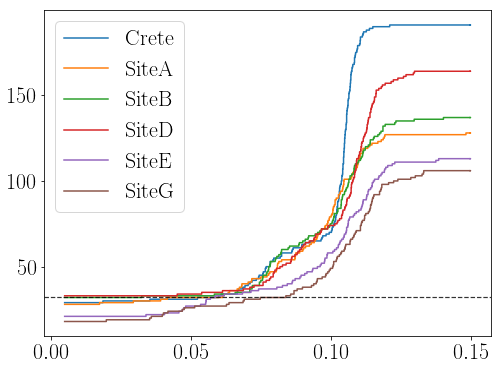

In [22]:
Sites = list(coreNames.drop([1,2,5,8,10]))
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(Sites)):
    plt.step(DiffLens[i], Npeaks[i], label=Sites[i])
plt.axhline(y=32,ls='--',color='k', lw=1.2, alpha=0.8)
plt.legend()

In [ ]:
arr_diffLens = np.asarray(arr_DiffLens)
val = arr_diffLens[(arr_diffLens >= 0.08) & (arr_diffLens <= 0.0801)]
idx = np.where(arr_diffLens == val)[0][0]

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
i=idx
print(arr_DiffLens[i])

plt.plot(arr_depth[0],arr_data[0],'-',marker='.', label=f'Diff len: {arr_DiffLens[0]:.3f}')
plt.plot(arr_depth[i], arr_data[i],'-',marker='.',label=f'Diff len: {val[0]:.3f}')
plt.plot(depth_LT,d18O_LT - np.mean(d18O_LT),'-',marker='.', label='Data', color='k')
plt.legend();